<a href="https://colab.research.google.com/github/omkar123katare/Capstone_4_Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Identify major customer segments on a transnational data set. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#**Importing Libraries and Data**

---





### importing required libraries for dataframe and visualization

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy
import scipy.stats as stat
import math
import sklearn

### importing plotly library for visualizations and choropleth map plots

In [208]:
!pip install plotly --upgrade
import plotly.graph_objs as go
import plotly 
import plotly.offline as offline
from plotly.subplots import make_subplots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### importing required libraries for clustering

In [209]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


### importing libraries required for Hierarchical clustering

In [210]:

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#**Step 1 : Data Overview**

##**1.1 Reading data from drive**

In [211]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
# reading data from drive
df_original=pd.read_excel('/content/drive/MyDrive/Data Science Projects-AlmaBetter/Online Retail.xlsx')

##**1.2 Exploring Data**

In [213]:
# creating copy the data for backup
transaction_data=df_original.copy()
transaction_copy1=df_original.copy()

In [214]:
# Shape of our dataset
transaction_data.shape

(541909, 8)

In [215]:
# First 5 rows of our data
transaction_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [216]:
# Last 5 rows of our data
transaction_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [217]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [218]:
# Total number of null values in the dataset
transaction_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Obseravations-**
1.  'Description' column has 1454 Null values
2.  'CustomerID' column has 135080 Null values

In [219]:
transaction_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Observations-**


1.   Quantity column 
*   Average quantity ordered considering all the transactions is 9.55
*   Minimum quantity ordered is -80995. Quantity ordered cannot be negative. This could be an issue of potential data reversal. Further investigation is required to understand the data and manage the data reversal.
*   For 75% of the transactions quantity ordered is less than 10.
*   Maximum QUantity ordered is 80995.


---



2.   UnitPrice column
*   Average Unit price for each type of product is 96.76 sterling.
*   minimum price recorded is -11062.06. Price cannot be negative. This could be representing cancellation of orders.
*   75% transactions have Unitprice below 4.13 sterling.
*   Maximum unit price value is 38970 sterling.

---





3.   CusotmerID
*   In total for 406829 transactions, we have CustomerIDs recorded in our records






###**Datatypes for each columns of the given dataframe**

In [220]:
# Datatypes of columns in the given data
for elem in transaction_data.columns:
  print(f'Data type of column {elem} in the transactions dataframe is {transaction_data[elem].dtypes}.')

Data type of column InvoiceNo in the transactions dataframe is object.
Data type of column StockCode in the transactions dataframe is object.
Data type of column Description in the transactions dataframe is object.
Data type of column Quantity in the transactions dataframe is int64.
Data type of column InvoiceDate in the transactions dataframe is datetime64[ns].
Data type of column UnitPrice in the transactions dataframe is float64.
Data type of column CustomerID in the transactions dataframe is float64.
Data type of column Country in the transactions dataframe is object.


###**Number of unique values from each columns of given dataframe**

In [221]:
# Number of unique elements in different columns of given dataset
features=[]
unique_count_=[]
# for loop for iterating through all the column names
for elem in transaction_data.columns:
  print (f'Column {elem} has {transaction_data[elem].nunique()} number of unique elements.')
  unique_count_.append(transaction_data[elem].nunique())
  features.append(elem)

Column InvoiceNo has 25900 number of unique elements.
Column StockCode has 4070 number of unique elements.
Column Description has 4223 number of unique elements.
Column Quantity has 722 number of unique elements.
Column InvoiceDate has 23260 number of unique elements.
Column UnitPrice has 1630 number of unique elements.
Column CustomerID has 4372 number of unique elements.
Column Country has 38 number of unique elements.


###**Plotting number of unique values from columns and names of columns on a bar plot**

In [222]:
# Creating arrays from features and unique_count_ lists
features_arr=np.array(features)
unique_count_arr=np.array(unique_count_)

In [223]:
# Creating DataFrame from the arrays
unique_df=pd.DataFrame()
unique_df['feature']=features_arr
unique_df['unique_feature_count']=unique_count_arr
unique_df.head()

,feature,unique_feature_count
0,InvoiceNo,25900
1,StockCode,4070
2,Description,4223
3,Quantity,722
4,InvoiceDate,23260


In [224]:
# Plotting plotly bar plot from unique_df dataframe
fig0 = px.bar(unique_df, x='feature', y='unique_feature_count',text_auto='.2s')
fig0.show()

**Observations-**
1. We have customers from 38 different countries
2. Our database has data of 4372 unique customers
3. Seller has sold 4070 different types of products


###**Exploring UnitPrice column**

In [225]:
# Sorted unique values in the Unit price column
unit_price_array=np.sort(transaction_data['UnitPrice'].unique())

In [226]:
# creating unit price dataframe containing sorted unique unit price values
unit_price_=pd.DataFrame(unit_price_array,columns=['Unit_price'])

In [227]:
# Plotting plotly scatter plot from unit_price dataframe to see distribution of unit price values
fig1 = px.scatter(x=range(len(unit_price_)), y=unit_price_array)
fig1.show()

In [228]:
## Plotting box plot to see distribution of unit price values on box plot
fig2 = px.box(unit_price_, y="Unit_price",points="all")
fig2.show()


**Observations-**
 1.  Here it can be observed that a few high values are present in the Unit_price column. To decide whether these are outliers, further investigation is required to be done ( like noting the values in the qualtity column and also by noting previous buying behaviour of these customers.)
 2.  Quarter 1(25 percentile) to Quarter 3(75 percentile) value range is from 8.47 to 229.7

In [229]:
# Descriptive statistics for UnitPrice
transaction_data['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

**Obseravation**
Minimum unitprice recorded is -11062 sterling.

###**Exploring Quantity column**

In [230]:
# Unique values in the Quantity column
transaction_data['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [231]:
# Creating sorted array of unique values of quantity
Quantity_array=np.sort(transaction_data['Quantity'].unique())

In [232]:
# Creating Dataframe from Quantity_array array
Quantity_=pd.DataFrame(Quantity_array,columns=['Quantity_ordered'])

In [233]:
# Plotting scatter plot from Quantity Dataframe to see distribution of quanity values on scatter plot
fig = px.scatter(x=range(len(Quantity_array)), y=Quantity_array)
fig.show()

In [234]:
# Plotting box plot to see distribution of quantity values on box plot
fig = px.box(Quantity_, y="Quantity_ordered",points="all")
fig.show()

**Observations-**
 1.  Here it can be observed that a few  values having very high and very low values are present in the Quantity_ordered column. To decide whether these are outliers, further investigation is required to be done ( like understanding issue of reverse entries also we need to understand previous buying behaviour of these customers)
 2.  Quarter 1(25 percentile) to Quarter 3(75 percentile) value range is from 8.47 to 229.7

In [235]:
# Descriptive statistics for Quantity column.
transaction_data['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

**Obseravtion-**
Minimum Quanity ordered recorded is -80995 which is not possible. Further investigation is needed to handle this data.

###**Exploring Country column**

In [236]:
# Unique values in the country column
transaction_data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

###**Exploring Stockcode column**

In [237]:
# Descriptive statistics for StockCode column.
transaction_data['StockCode'].describe()

count     541909
unique      4070
top       85123A
freq        2313
Name: StockCode, dtype: object

**Observation-**
There are 4070 unique prodict codes. '85123A' is the most common product code appeared 2301 times.

###**Exploring country column**

In [238]:
# Descriptive Statistics for Country
transaction_data['Country'].describe()

count             541909
unique                38
top       United Kingdom
freq              495478
Name: Country, dtype: object

**Observation-** Majority of customers reside in United Kingdom

###**Exploring product description column**

In [239]:
# top 10 selling products by their counts in data set.
transaction_data['Description'].value_counts().sort_values(ascending=False)[:10]

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

#**Step 2 : Data Cleaning**

---



##**2.1 Handling duplicate records in dataset**

In [240]:
# Number of duplicate records
print(f"Number of duplicate transaction records :{transaction_data.duplicated().sum()}")

Number of duplicate transaction records :5268


In [241]:
# Removing duplicates
print("Retail transactions before removing duplicates  : {}".format(transaction_data.shape[0]))
transaction_data = transaction_data.drop_duplicates()
print("Retail transactions after duplicates removal : {}".format(transaction_data.shape[0]))

Retail transactions before removing duplicates  : 541909
Retail transactions after duplicates removal : 536641


##**2.2 Handling missing values in the dataset**

In [242]:
# Detect missing values
transaction_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

**Missing values in Desciption column**  In further analysis, while performing RFM analysis, this column won't contribute. Hence, if we drop these rows, we might lose important infomation from other columns corresponding to these rows.

**Missing values in CustomerID column (Assumption)**Null value in customer ID can mean that these are new customers whose data is not stored with company. Further investigation is needed to conclude. Customer ID is an important column (identifier) for clustering algorithm. We will drop these rows after we analyze the dataset for cancelled orders( with respect to countries, order date, product code).

In [243]:
transaction_data[transaction_data['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


##**2.3 Handling garbage data in the dataset**

Negative Quantity represents cancelled orders. But there are  entries which are are not marked as cancelled tranactions but still Quantity column has negative values and unit price shown as '0'. This is garbage data and we need to remove this garbage data.

In [244]:
# rows having Quantity ordered as negative
neg_quant=transaction_data[transaction_data['Quantity']<0]

In [245]:
# function to get the rows for which marking of cancellation is not done
def cancelled(row):
  if row[0]=='C':
    return False
  else:
    return True

In [246]:
# Getting the data in string format so as to identify the elements which have first character of InvoiceNo as "C"
neg_quant_str=neg_quant['InvoiceNo'].apply(lambda z:str(z))

In [247]:
cancelled_neg_transactions=neg_quant_str.apply(lambda x:cancelled(x))

In [248]:
# Garbage data dataframe
garbage_data=neg_quant.loc[cancelled_neg_transactions]

In [249]:
# Dropping garbage data from the dataset
transaction_data.drop(garbage_data.index,inplace=True)

##**2.4 Converting StockCode column to category datatype**

Stockcode is made up of 4070 unique elements. We need to convert this column to category datatype.

In [250]:
# Using astype to change datatype of the column stockcode
transaction_data['StockCode']=transaction_data['StockCode'].astype('category')
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535305 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535305 non-null  object        
 1   StockCode    535305 non-null  category      
 2   Description  534713 non-null  object        
 3   Quantity     535305 non-null  int64         
 4   InvoiceDate  535305 non-null  datetime64[ns]
 5   UnitPrice    535305 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      535305 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 33.8+ MB


#**Step 3 : Hypothesis Based Exploratory Data Analysis**

---



## **Based on InvoiceDate column**

**Hypothesis:**

1. **Sale trend is increasing over the months.**
2. **Number of transactions increase during some months.**
3. **Time of transaction will follow some trend. Time of transactions will be suring office hours**

In [251]:
# Getting number of transactions grouped by date column 
tranactions_wrt_timeline = transaction_data.groupby('InvoiceDate')['CustomerID'].count()
tranactions_wrt_timeline=pd.DataFrame(tranactions_wrt_timeline)
tranactions_wrt_timeline=tranactions_wrt_timeline.reset_index()
tranactions_wrt_timeline.columns=['TimeLine','Number of transactions']
tranactions_wrt_timeline.head()

,TimeLine,Number of transactions
0,2010-12-01 08:26:00,7
1,2010-12-01 08:28:00,2
2,2010-12-01 08:34:00,16
3,2010-12-01 08:35:00,1
4,2010-12-01 08:45:00,20


In [252]:
# Plotting number of transactions trend on plotly line plot
fig = px.line(tranactions_wrt_timeline, x="TimeLine", y="Number of transactions")
fig.show()

**Obseravation :** 
1.  **Hypothesis True** In H0 we assumed that **Sale trend is increasing over the months.** We can inrprete from the graph that **Number of transaction have been rising over the months.**

In [253]:
import datetime as dt
# Convering dataype of InvoiceDate column to Datetime type
transaction_data['InvoiceDate'] = pd.to_datetime(transaction_data['InvoiceDate'])
# Creating new column representing sale amount
transaction_data['Total_amount']=transaction_data['Quantity']*transaction_data['UnitPrice']
# Creaintg new column 'month' from invoice date column
transaction_data['Month'] = transaction_data['InvoiceDate'].dt.month
# Creating new column 'day' from invoice date column
transaction_data['Day'] = transaction_data['InvoiceDate'].dt.day
# Creating new column 'hour' from invoice date column
transaction_data['Hour'] = transaction_data['InvoiceDate'].dt.hour

In [254]:
# plotting sale amount with respect to month column  using plotly bar graph 
monthly_sales = transaction_data[['Month', 'Total_amount']].groupby('Month').sum()
fig = px.bar(monthly_sales.reset_index(), x='Month', y='Total_amount')
fig.show()

**Obseravation :** 
2.  **Hypothesis True** In H0 we assumed that **Number of transactions increase during some months** We can interprete from the graph that **Number of transaction have been rising over the months. Most of the sales happened in between September and December month (Christmas festive sales)**



In [255]:
# Getting total number dales grouped by hour column
hourly_sales = transaction_data[['Hour', 'Total_amount']].groupby('Hour').sum()
# Plotting plotly barplot 
fig4 =px.bar(hourly_sales.reset_index(), x='Hour', y='Total_amount')
fig4.show()


**Observation :**
3. **Hypothesis True** In H0 we assumed that**Time of transaction will follow some trend. Time of transactions will be suring office hours** We can inrprete from the graph that **most of the sales happened during the time frame of 10 am to 4pm**



In [256]:
# getting total sale made grouped by Day column
daily_sales = transaction_data[['Day', 'Total_amount']].groupby('Day').sum()
# Plotting plotly bar plot
fig5 = px.bar(daily_sales.reset_index(), x='Day', y='Total_amount')
fig5.show()

**Obseravtions :** Sales are on highr side during start of the month.

##**Based on cancelled transactions.**

**Hypothesis :**
4. **Country wise cancelled transactions will follow similar trend as of country wise number of transactions.**
5. **there will not be any specifit trend followed for cancelled transactions**

In [257]:
# function to get the rows for which marking of cancellation is not done
def cancelled(row):
  if row[0]=='C':
    return False
  else:
    return True

In [258]:
# Converintg Invoice number column to string datatype
cancelled_trans=transaction_data['InvoiceNo'].apply(lambda x:str(x))

In [259]:
# Applying function cancelled() to the InvoiceNo column in cancelled_trans datafrmae to get boolean series representing cancelled and not cancelled transactions
cancelled_data=transaction_data[~cancelled_trans.apply(lambda z:cancelled(z))]

In [260]:
cancelled_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount,Month,Day,Hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,12,1,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,12,1,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,12,1,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,12,1,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,12,1,10


In [261]:
# transactions flagged as cancelled transactions 
cancelled_data.shape

(9251, 12)

In [262]:
print(f"Percentage of orders cancelled is {cancelled_data.shape[0]*100/transaction_data.shape[0]}")

Percentage of orders cancelled is 1.7281736580080516


So, 8872 (approximately 2%) of the transactions were flagged as cancelled transactions.

In [263]:
#for thetransaactions flagged as canceeld, grouping by countries and getting number of cancelled tranactions for each country
cancelled_data_countries=cancelled_data.groupby('Country')['InvoiceNo'].count().reset_index()
cancelled_data_countries=cancelled_data_countries.sort_values('InvoiceNo',ascending=False)
# Plotting plotly bar graph showing number of transactions wrt countries
fig6 = px.bar(cancelled_data_countries.reset_index(), x='Country', y='InvoiceNo')
fig6.show()

**Observation :**
4. **Hypothesis True** In H0 we assumed that **Country wise cancelled transactions will follow similar trend as of country wise number of transactions** We can inrprete from the graph that **trend in both the cases has been similar**



In [264]:
# Month wise number of cancelled transactions grouped by months
cancelled_data_month=cancelled_data.groupby('Month')['InvoiceNo'].count().reset_index()
cancelled_data_month=cancelled_data_month.sort_values('InvoiceNo',ascending=False)
# Plotting plotly graph
fig7 = px.bar(cancelled_data_month.reset_index(), x='Month', y='InvoiceNo')
fig7.show()

**Observation :**
5. **Hypothesis False** In H0 we assumed that **there will not be any specifit trend followed for cancelled transactions** We can inrprete from the graph that **Cancellation of transactions have increased at the end of year.**



##**Based on stock code column.**

**Hypothesis :**
6. **Different types of stocks solds will have similar proportion.**


In [265]:
# Getting number transactions grouped by stock codes
cancelled_data_procuct=cancelled_data.groupby('StockCode')['InvoiceNo'].count().reset_index()
cancelled_data_procuct=cancelled_data_procuct.sort_values('InvoiceNo',ascending=False)
# converting column to string type
cancelled_data_procuct['StockCode']=cancelled_data_procuct['StockCode'].apply(lambda x:str(x))

In [266]:
cancelled_data_procuct.head()

,StockCode,InvoiceNo
3947,M,244
1241,22423,180
3949,POST,126
1755,22960,87
3938,D,77


In [267]:
# plotting plotly bar plot showing stockcodes wrt number sales of that product
fig7 = px.bar(cancelled_data_procuct[:50], x='StockCode', y='InvoiceNo')
fig7.show()

**Observation :**
6. **Hypothesis False** In H0 we assumed that **Different types of stocks solds will have similar proportion** We can inrprete from the graph that **there is high distortion in the proporting of different ypes of stocks sold.**


##**Based on stock code column.**

**Hypothesis :**
7. **Unique customers who started buying from the company, connected with us in some specific months.**


In [268]:
# setting index of cancelled data dataframe to be InvoiceNo column
cancelled_data=cancelled_data.set_index('InvoiceNo')
# creaint gcopy of datafrmae transaction_cpoy1
transaction_copy1=transaction_copy1.set_index('InvoiceNo')
cleaned_data=transaction_copy1.drop(cancelled_data.index,axis=0)
# creating column total amount
cleaned_data['Total_amount']=cleaned_data['Quantity']*cleaned_data['UnitPrice']
# creating month column
cleaned_data['Month'] = cleaned_data['InvoiceDate'].dt.month
#creating day column
cleaned_data['Day'] = cleaned_data['InvoiceDate'].dt.day
#creating hour column
cleaned_data['Hour'] = cleaned_data['InvoiceDate'].dt.hour

cleaned_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount,Month,Day,Hour
InvoiceNo,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8


In [269]:
# grouping by CustomerID column and getting total amount of sales of each group
cleaned_data_customer_amounts=cleaned_data.groupby('CustomerID').Total_amount.sum().reset_index()
cleaned_data_customer_amounts=cleaned_data_customer_amounts.sort_values(by='Total_amount',ascending=False)
# changing datatype of 'CustomerID' column to string datatype
cleaned_data_customer_amounts['CustomerID']=cleaned_data_customer_amounts['CustomerID'].apply(lambda x:str(x))
cleaned_data_customer_amounts.head()

,CustomerID,Total_amount
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194550.79
3009,16446.0,168472.50
1880,14911.0,143825.06


In [270]:
#plotting plotly bar graph showing customerid and total sales amount
fig8 = px.bar(cleaned_data_customer_amounts[:15], x='CustomerID', y='Total_amount')
fig8.show()

**Observation :** Customers having IDs 14646, 18102, 1745 are our top 3 customers. 

In [271]:
# Getting the month when a new customer orderes from company usgin group by and taking min of date column to get the first time customer has ordered.
cleaned_data_customer_unique_joined=cleaned_data.groupby('CustomerID').Month.min().reset_index()
cleaned_data_customer_unique_joined.head()

,CustomerID,Month
0,12346.0,1
1,12347.0,1
2,12348.0,1
3,12349.0,11
4,12350.0,2


In [272]:
# Getting count of new customers for every month by grouping by month column and counting the number of customers.
cleaned_data_customer_unique_joined=cleaned_data_customer_unique_joined.groupby('Month')['CustomerID'].count().reset_index()
# Plotting a plotly graph sheing month on X axis and number of new customers on Y axis
fig9 = px.bar(cleaned_data_customer_unique_joined, x='Month', y='CustomerID',color='CustomerID')
fig9.show()

**Observation :**
7. **Hypothesis True** In H0 we assumed that **Unique customers who started buying from the company, connected with us in some specific months** We can inrprete from the graph that **Unique customers who started buying from the company got connected to us in larger numbers in the months of January, February, March. In the months July,August,December very few new customers started buying from company.**


##**Based on Description column.**

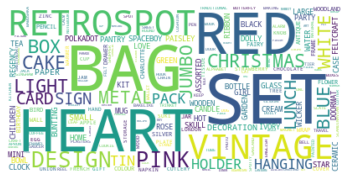

In [273]:
%matplotlib inline
from wordcloud import WordCloud
#Creating the text variable
text = " ".join(str(cat) for cat in cleaned_data.Description)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Observation-** Some of the most ordered products have words like red,bag,Heart,set as their description.

##**Based on Country column.**

**Hypothesis :**
8. **Transactions will be the highest in the contry where the store is based.**
9. **Major revenue will come out of country where the store is based**
10. **Sales will br high in the countries nighbouring to country where the store is based and in the countries with which UK is connected well through sea routes or rail routes**


In [274]:
# getting countries along with their number transactions 
top_countries=pd.DataFrame(transaction_data['Country'].value_counts()).reset_index()

In [275]:
# gapminder() is a dataset prestored in plotly express. We need this dataset to get iso_alpha codes for plotting countries on choropleth maps
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [276]:
top_countries.head()

,index,Country
0,United Kingdom,488964
1,Germany,9480
2,France,8541
3,EIRE,8184
4,Spain,2528


In [277]:
top_countries.columns=['country','Number of transactions']
# Getting pecentage contribution of countries to number transactions
top_countries['Country_wise_contribution_to_no_of_transactions']=top_countries['Number of transactions']*100/top_countries['Number of transactions'].sum()
top_countries.head()

,country,Number of transactions,Country_wise_contribution_to_no_of_transactions
0,United Kingdom,488964,91.343066
1,Germany,9480,1.770953
2,France,8541,1.595539
3,EIRE,8184,1.528848
4,Spain,2528,0.472254


In [278]:
# Plotting plotly bar plot representing number transactions corresponding to to 10 countries
fig1=px.bar(top_countries[:10], x='country', y='Number of transactions', color='Number of transactions',height=400)
fig1.show()

In [279]:
# This is pre stored dataframe from plotly express library. We have imported this so as to match country names in our dataframe with their corresponding iso_alpha codes.
df = px.data.gapminder()

In [280]:
# Creating dataframe with corresponding iso_names for the countries. 
top_countries_with_iso_names=df.merge(top_countries,on='country',how="right")
top_countries_with_iso_names=top_countries_with_iso_names[['country','iso_alpha','Number of transactions']]

In [281]:
# Plotting plotly choropleth map
mapping1=px.choropleth(top_countries_with_iso_names,locations='iso_alpha',color='Number of transactions', hover_name="country")
mapping1.show()



**Observation :**
8. **Hypothesis True** In H0 we assumed that **transactions will be the highest in the contry where the store is based** We can inrprete from the graph that **Number of transactions are highest in the UK.**


In [282]:
# Getting country wise total sale amount after grouping by country column
Country_wise_business=pd.DataFrame(transaction_data.groupby('Country')['Total_amount'].sum())
Country_wise_business.reset_index(inplace=True)
Country_wise_business.sort_values(by='Total_amount',ascending=False,inplace=True)
Country_wise_business.columns=['country','Total_amount']
Country_wise_business.head()

,country,Total_amount
36,United Kingdom,8167128.184
24,Netherlands,284661.540
10,EIRE,262993.380
14,Germany,221509.470
13,France,197317.110


In [283]:
# Plotting plotly bar plot representing countris and total sale amount corresponding to those countries
fig2=px.bar(Country_wise_business[:10], x='country', y='Total_amount', color='Total_amount',height=400)
fig2.show()

In [284]:
# Creating dataframe with corresponding iso_names for the countries. 
top_countries_wrt_amount_with_iso_names=df.merge(Country_wise_business,on='country',how="right")
top_countries_wrt_amount_with_iso_names=top_countries_wrt_amount_with_iso_names[['country','iso_alpha','Total_amount']]

In [285]:
# plotting plotly choropleth map
mapping2=px.choropleth(top_countries_wrt_amount_with_iso_names,locations='iso_alpha',color='Total_amount', hover_name="country")
mapping2.show()




**Observation :**
9. **Hypothesis True** In H0 we assumed that **Major revenue will come out of country where the store is based** We can inrprete from the graph that **Highest sales have been in the UK of the value 8.16 millions.**


**Observation :** In H0 we assumed that **Sales will br high in the countries nighbouring to country where the store is based and in the countries with which UK is connected well through sea routes or rail routes**. From choropleth maps we can observe that **sales have been highest to countries like "Nehterlands", "Ireland", "Germany", "France", "Australia". Which are well connected to the UK.**

In [286]:
# Getting countries and their importance to business value by (total sale amount/ total number of transactions)
Country_wise_business.sort_values(by='country',inplace=True)
top_countries.sort_values(by='country',inplace=True)
country_importance=Country_wise_business.merge(top_countries,on='country',how='left')
country_importance['importance']=country_importance['Total_amount']/country_importance['Number of transactions']

In [287]:
# Top 10 most profitable countries for business
country_importance.sort_values(by='importance',ascending=False)[:10]

,country,Total_amount,Number of transactions,Country_wise_contribution_to_no_of_transactions,importance
24,Netherlands,284661.54,2371,0.442925,120.059696
0,Australia,137009.77,1258,0.235006,108.910787
20,Japan,35340.62,358,0.066878,98.716816
32,Sweden,36585.41,461,0.086119,79.360976
9,Denmark,18768.14,389,0.072669,48.247147
22,Lithuania,1661.06,35,0.006538,47.458857
30,Singapore,9120.39,229,0.042779,39.827031
21,Lebanon,1693.88,45,0.008406,37.641778
4,Brazil,1143.60,32,0.005978,35.737500
16,Hong Kong,9908.24,284,0.053054,34.888169


In [288]:
# PLotting plotly bar plot representing countries and their imprtance for our business
fig3=px.bar(country_importance[:10], x='country', y='importance', color='importance',height=400)
fig3.show()

In [289]:
# merginf prestores df dataframe and country_importance dataframe to get iso_alpha column corresponding to different countries
country_importance=country_importance[['country','importance']]
country_importance_plot=country_importance.merge(df,on='country',how='left')
country_importance_plot=country_importance_plot[['country','iso_alpha','importance']]

In [290]:
country_importance_plot.head()

,country,iso_alpha,importance
0,Australia,AUS,108.910787
1,Australia,AUS,108.910787
2,Australia,AUS,108.910787
3,Australia,AUS,108.910787
4,Australia,AUS,108.910787


In [291]:
#plotting plotly choropleth map
mapping3=px.choropleth(country_importance_plot,locations='iso_alpha',color='importance', hover_name="country")
mapping3.show()

In [292]:
# plotly scatter plot showing countries along with their importance value for our business
fig = px.scatter(country_importance_plot, x="country", y="importance",size='importance',color="importance")
fig.show()

###**Observations-**
1. 94.5% of the transactions were with customers belonging to United Kingdom
2. With respect to total amount of transactions, as expected UK has the lrgest contribution.
3. But, Netherlands which is not in the top 5 countries wrt number transactions, is at the second spot with respect to total transaction amounts. Which suggests, we have sold products wigh high prices to Netherlands.
4. If we look at top 5 countries by the ratio of total amount of transactions and number of transactions, top 5 countries are Netherlands, Australia, Japan, Sweden, Denmark. As these are the most profitable countries, we need to focus on business of these countries. Surprisingly United Kingdom lies in the last 5 countries in importance category. even after contributing highest in sale amount.

#**Step 3 : Feature Engineering for RFM(Recency, Frequency and Monetary) model**

---



RFM is a behavioural customer segmentation for measuring customer value.

**Receny :** How recent was each customer's last purchase

**Frequency :** How many times the customer purchased in the last 12 months

**Monetary :**Value: How much has the customer spent in the last 12 months



**Recency Feature :**

To create a Recency feature variable, we need to decide the reference date for analysis and we wil define the reference date as one day before the last transaction.

We fix a reference date for finding the recent transactions. The reference date would be a day after the most recent transaction date in the dataset. Then we calculate the days difference between the most recent transaction carried out by the customer and this reference date

In [293]:
cleaned_data=cleaned_data.dropna()
cleaned_data=cleaned_data.query("Quantity>0")

In [294]:
cleaned_data[cleaned_data['Total_amount']==0].shape

(40, 11)

There are 40 transactions for which uni tprice recorded is zero. This does not make sense. We need to remove these 40 transactions from our records

In [295]:
cleaned_data=cleaned_data[cleaned_data['Total_amount']!=0]

In [296]:
reference_date = cleaned_data.InvoiceDate.max()

#timedelta function returns to total number of seconds
reference_date = reference_date + datetime.timedelta(days=1)

print(f'Recent transaction was recorded on {cleaned_data.InvoiceDate.max()} oldest transaction was recorded on {cleaned_data.InvoiceDate.min()}')
print(f'Referece date considered for recency feature is {reference_date}')

Recent transaction was recorded on 2011-12-09 12:50:00 oldest transaction was recorded on 2010-12-01 08:26:00
Referece date considered for recency feature is 2011-12-10 12:50:00


In [297]:
cleaned_data['days_since_last_purchase'] = reference_date- cleaned_data.InvoiceDate
cleaned_data['days_since_last_purchase_num'] = cleaned_data['days_since_last_purchase'].astype('timedelta64[D]')
cleaned_data.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount,Month,Day,Hour,days_since_last_purchase,days_since_last_purchase_num
InvoiceNo,,,,,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,374 days 04:24:00,374.0
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,374 days 04:24:00,374.0
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,374 days 04:24:00,374.0
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,374 days 04:24:00,374.0
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,374 days 04:24:00,374.0


In [298]:
customer_history_df = cleaned_data.groupby('CustomerID')['days_since_last_purchase_num'].min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
customer_history_df.head()

,CustomerID,Recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


**Monetary Feature**

In [299]:
customer_monetary_value=cleaned_data[['CustomerID','Total_amount']].groupby("CustomerID")["Total_amount"].sum().reset_index()
customer_monetary_value.rename(columns={'Total_amount':'Monetary'}, inplace=True)
customer_monetary_value.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


**Frequecy Feature**

In [300]:
customer_frequency_value=cleaned_data.groupby('CustomerID')['Description'].count().reset_index()
customer_frequency_value.rename(columns={'Description':'Frequency'},inplace=True)
customer_frequency_value.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [301]:
customer_RMF_df=customer_frequency_value.merge(customer_monetary_value,on='CustomerID',how='outer')
customer_RMF_df=customer_history_df.merge(customer_RMF_df,on='CustomerID',how='outer')
customer_RMF_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326.0,1,77183.60
1,12347.0,2.0,182,4310.00
2,12348.0,75.0,31,1797.24
3,12349.0,19.0,73,1757.55
4,12350.0,310.0,17,334.40


In [302]:
customer_RMF_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,91.720609,2054.266460
std,1721.808492,100.014169,228.785094,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,17.000000,307.415000
50%,15299.500000,51.000000,41.000000,674.485000
75%,16778.750000,142.000000,100.000000,1661.740000
max,18287.000000,374.000000,7847.000000,280206.020000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Recency's: Skew: 1.2456166142880103, : SkewtestResult(statistic=26.606793376917242, pvalue=5.664292789640091e-156)
Frequency's: Skew: 18.09990377360193, : SkewtestResult(statistic=83.56042637346283, pvalue=0.0)
Monetary's: Skew: 19.31827038422538, : SkewtestResult(statistic=84.99544548748324, pvalue=0.0)


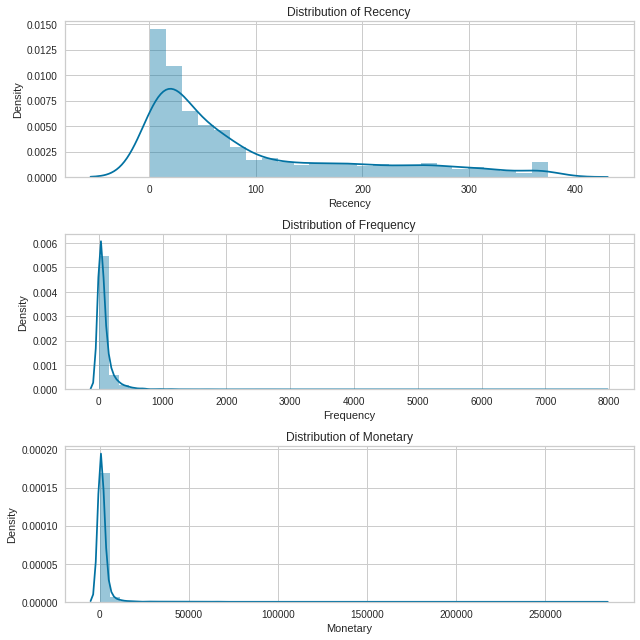

In [303]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
#check_skew(customer_history_df,'Recency')
skew = stat.skew(customer_RMF_df['Recency'])
skewtest = stat.skewtest(customer_RMF_df['Recency'])
plt.title('Distribution of ' + 'Recency')
sns.distplot(customer_RMF_df['Recency'])
print("{}'s: Skew: {}, : {}".format('Recency', skew, skewtest))

plt.subplot(3, 1, 2)
#check_skew(customer_history_df,'Frequency')
skew = stat.skew(customer_RMF_df['Frequency'])
skewtest = stat.skewtest(customer_RMF_df['Frequency'])
plt.title('Distribution of ' + 'Frequency')
sns.distplot(customer_RMF_df['Frequency'])
print("{}'s: Skew: {}, : {}".format('Frequency', skew, skewtest))

plt.subplot(3, 1, 3)
#check_skew(customer_history_df,'Monetary')
skew = stat.skew(customer_RMF_df['Monetary'])
skewtest = stat.skewtest(customer_RMF_df['Monetary'])
plt.title('Distribution of ' + 'Monetary')
sns.distplot(customer_RMF_df['Monetary'])
print("{}'s: Skew: {}, : {}".format('Monetary', skew, skewtest))
    
    
plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)


**Removing skewnwss**

In [304]:
customer_RMF_df_log=np.log(customer_RMF_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Recency's: Skew: -0.5543745693187032, : SkewtestResult(statistic=-13.977010237185045, pvalue=2.1534611206609193e-44)
Frequency's: Skew: -0.2181640978733256, : SkewtestResult(statistic=-5.8088140125229355, pvalue=6.291693474852034e-09)
Monetary's: Skew: 0.3808047057150326, : SkewtestResult(statistic=9.919004330769194, pvalue=3.441722182242082e-23)


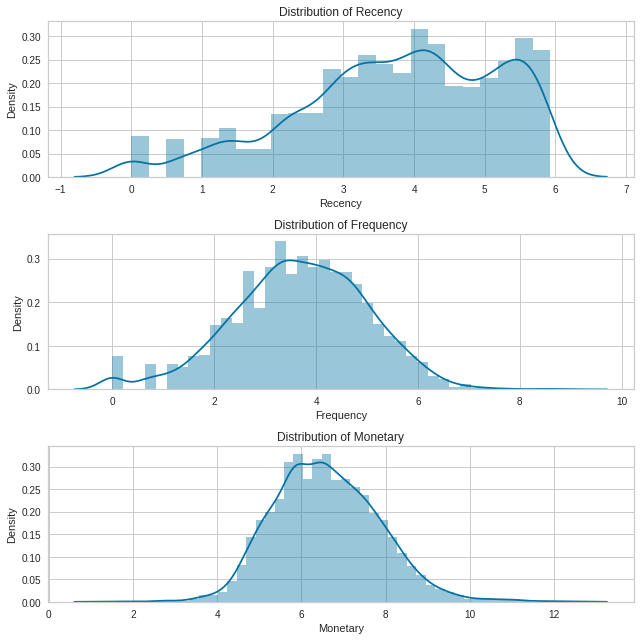

In [305]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
#check_skew(customer_history_df,'Recency')
skew = stat.skew(customer_RMF_df_log['Recency'])
skewtest = stat.skewtest(customer_RMF_df_log['Recency'])
plt.title('Distribution of ' + 'Recency')
sns.distplot(customer_RMF_df_log['Recency'])
print("{}'s: Skew: {}, : {}".format('Recency', skew, skewtest))

plt.subplot(3, 1, 2)
#check_skew(customer_history_df,'Frequency')
skew = stat.skew(customer_RMF_df_log['Frequency'])
skewtest = stat.skewtest(customer_RMF_df_log['Frequency'])
plt.title('Distribution of ' + 'Frequency')
sns.distplot(customer_RMF_df_log['Frequency'])
print("{}'s: Skew: {}, : {}".format('Frequency', skew, skewtest))

plt.subplot(3, 1, 3)
#check_skew(customer_history_df,'Monetary')
skew = stat.skew(customer_RMF_df_log['Monetary'])
skewtest = stat.skewtest(customer_RMF_df_log['Monetary'])
plt.title('Distribution of ' + 'Monetary')
sns.distplot(customer_RMF_df_log['Monetary'])
print("{}'s: Skew: {}, : {}".format('Monetary', skew, skewtest))
    
    
plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)


**Outlier Treatment**

In [306]:
# Box plot of Recency
# plt.rcParams['figure.figsize'] = [10,8]
# sns.boxplot(data = customer_RMF_df['Recency'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
# plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
# plt.ylabel("Range", fontweight = 'bold')
# plt.xlabel("Attribute - Recency", fontweight = 'bold')
# plt.show()

fig = px.box(customer_RMF_df, y="Recency")
fig.show()

In [307]:
# Box plot of customer_RMF_df
# plt.rcParams['figure.figsize'] = [10,8]
# sns.boxplot(data = customer_RMF_df['Frequency'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
# plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
# plt.ylabel("Range", fontweight = 'bold')
# plt.xlabel("Attribute - Frequency", fontweight = 'bold')
# plt.show()

fig = px.box(customer_RMF_df, y="Frequency")
fig.show()

In [308]:
# Box plot of Monetary
# plt.rcParams['figure.figsize'] = [10,8]
# sns.boxplot(data = customer_RMF_df['Monetary'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
# plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
# plt.ylabel("Range", fontweight = 'bold')
# plt.xlabel("Attribute - Monetary", fontweight = 'bold')
# plt.show()

fig = px.box(customer_RMF_df, y="Monetary")
fig.show()


**Treatment**

In [309]:
# removing (statistical) outliers

# outlier treatment for recency
Q1 = customer_RMF_df.Recency.quantile(0.05)
Q3 = customer_RMF_df.Recency.quantile(0.95)
IQR = Q3 - Q1
customer_RMF_df = customer_RMF_df[(customer_RMF_df.Recency >= Q1 - 1.5*IQR) & (customer_RMF_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for Monetary
Q1 = customer_RMF_df.Monetary.quantile(0.05)
Q3 = customer_RMF_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
customer_RMF_df = customer_RMF_df[(customer_RMF_df.Monetary >= Q1 - 1.5*IQR) & (customer_RMF_df.Monetary <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = customer_RMF_df.Frequency.quantile(0.05)
Q3 = customer_RMF_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
customer_RMF_df = customer_RMF_df[(customer_RMF_df.Frequency >= Q1 - 1.5*IQR) & (customer_RMF_df.Frequency <= Q3 + 1.5*IQR)]

In [310]:
customer_RMF_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4256.000000,4256.000000,4256.000000,4256.000000
mean,15302.110667,93.982378,76.516447,1321.507578
std,1721.941368,100.208187,98.807378,1816.413409
min,12347.000000,1.000000,1.000000,3.750000
25%,13812.750000,19.000000,17.000000,304.415000
50%,15305.000000,52.000000,40.000000,657.265000
75%,16780.250000,145.000000,96.000000,1571.285000
max,18287.000000,374.000000,710.000000,14389.900000


In [311]:
customer_RMF_df.head()

,CustomerID,Recency,Frequency,Monetary
1,12347.0,2.0,182,4310.00
2,12348.0,75.0,31,1797.24
3,12349.0,19.0,73,1757.55
4,12350.0,310.0,17,334.40
5,12352.0,36.0,85,2506.04


In [312]:
customer_RMF_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4256 entries, 1 to 4337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4256 non-null   float64
 1   Recency     4256 non-null   float64
 2   Frequency   4256 non-null   int64  
 3   Monetary    4256 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 166.2 KB


In [313]:
# Box plot of Recency
# plt.rcParams['figure.figsize'] = [10,8]
# sns.boxplot(data = customer_RMF_df['Recency'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
# plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
# plt.ylabel("Range", fontweight = 'bold')
# plt.xlabel("Attribute - Recency", fontweight = 'bold')
# plt.show()

fig = px.box(customer_RMF_df, y="Recency")
fig.show()

In [314]:
# Box plot of Frequency
# plt.rcParams['figure.figsize'] = [10,8]
# sns.boxplot(data = customer_RMF_df['Frequency'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
# plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
# plt.ylabel("Range", fontweight = 'bold')
# plt.xlabel("Attribute - Frequency", fontweight = 'bold')
# plt.show()

fig = px.box(customer_RMF_df, y="Frequency")
fig.show()

In [315]:
# Box plot of Monetary
# plt.rcParams['figure.figsize'] = [10,8]
# sns.boxplot(data = customer_RMF_df['Monetary'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
# plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
# plt.ylabel("Range", fontweight = 'bold')
# plt.xlabel("Attribute - Monetary", fontweight = 'bold')
# plt.show()

fig = px.box(customer_RMF_df, y="Monetary")
fig.show()

In [316]:
customer_RMF_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4256.000000,4256.000000,4256.000000,4256.000000
mean,15302.110667,93.982378,76.516447,1321.507578
std,1721.941368,100.208187,98.807378,1816.413409
min,12347.000000,1.000000,1.000000,3.750000
25%,13812.750000,19.000000,17.000000,304.415000
50%,15305.000000,52.000000,40.000000,657.265000
75%,16780.250000,145.000000,96.000000,1571.285000
max,18287.000000,374.000000,710.000000,14389.900000


In [317]:
fig = px.scatter_3d(customer_RMF_df, x='Recency', y='Frequency', z='Monetary')
fig.show()

**Feature Scaling**



* Since, all the features like Recency, Frequency and Monetary value are within varying ranges of values, we need to standardize them.
* In addition, the feature like "Monetary value" can take a very large range of values. 
*So, to standardize all the inputs features, we apply log transform, so that the input to our clustering algorithm is a set of well scaled and transformed features.

In [318]:
# instantiate
scaler = StandardScaler()

# fit_transform
customer_RMF_df_scaled = scaler.fit_transform(customer_RMF_df[['Recency','Frequency','Monetary']])
customer_RMF_df_scaled.shape

(4256, 3)

In [319]:
customer_RMF_df_scaled=pd.DataFrame(customer_RMF_df_scaled)
customer_RMF_df_scaled.columns=['Recency','Frequency','Monetary']
customer_RMF_df_scaled.head()

,Recency,Frequency,Monetary
0,-0.918021,1.067693,1.645464
1,-0.189452,-0.460713,0.261938
2,-0.748354,-0.035593,0.240085
3,2.155942,-0.602419,-0.543502
4,-0.578687,0.085870,0.652204


In [320]:
fig = px.scatter_3d(customer_RMF_df_scaled, x='Recency', y='Frequency', z='Monetary')
fig.show()

**Observations :**

Customers who recently bought items, are also the ones who buy more freqently and place high value orders
Customers who transacted long time ago, also place lower valued orders
Customers who buy occasionally, do not tend to buy expensive items

#**Step 4 : Customer segmentation through clustering**

---



The Elbow Method
Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.

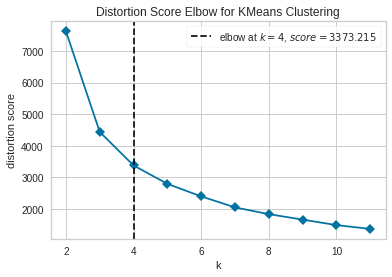

In [321]:
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
# X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='distortion', timings=False
)

visualizer.fit(customer_RMF_df_scaled)        # Fit the data to the visualizer
visualizer.show()   

In [322]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(customer_RMF_df_scaled)

KMeans(max_iter=50, n_clusters=4)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f01e252b350>,
                     estimator=KMeans(n_clusters=3))

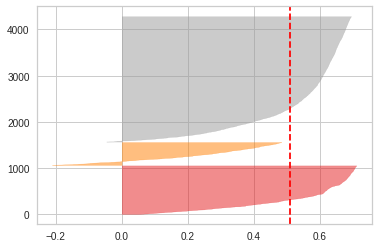

In [323]:
model = SilhouetteVisualizer(KMeans(3))
model.fit(customer_RMF_df_scaled)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f01e22fc6d0>,
                     estimator=KMeans(n_clusters=4))

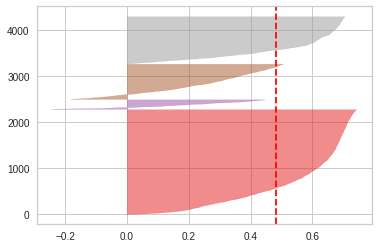

In [324]:
model = SilhouetteVisualizer(KMeans(4))
model.fit(customer_RMF_df_scaled)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f01e20ef890>,
                     estimator=KMeans(n_clusters=5))

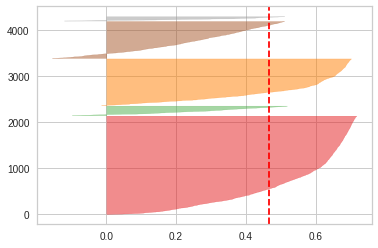

In [325]:
model = SilhouetteVisualizer(KMeans(5))
model.fit(customer_RMF_df_scaled)

In [326]:
# final model with k=4
kmeans_final = KMeans(n_clusters=3, max_iter=50)
kmeans_final.fit(customer_RMF_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [327]:
label1=kmeans.labels_

In [328]:
# assign the label
customer_RMF_df['cluster_id'] = kmeans.labels_
customer_RMF_df.head()

,CustomerID,Recency,Frequency,Monetary,cluster_id
1,12347.0,2.0,182,4310.00,3
2,12348.0,75.0,31,1797.24,2
3,12349.0,19.0,73,1757.55,2
4,12350.0,310.0,17,334.40,0
5,12352.0,36.0,85,2506.04,3


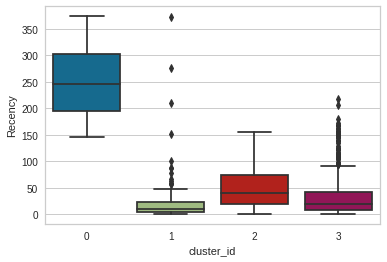

In [329]:
# plot
sns.boxplot(x='cluster_id', y='Recency', data=customer_RMF_df)
plt.show()

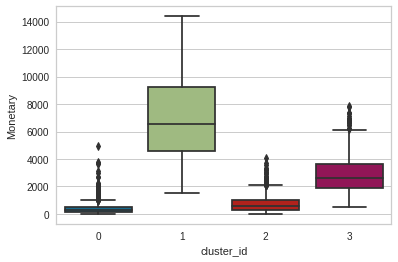

In [330]:
# plot
sns.boxplot(x='cluster_id', y='Monetary', data=customer_RMF_df)
plt.show()

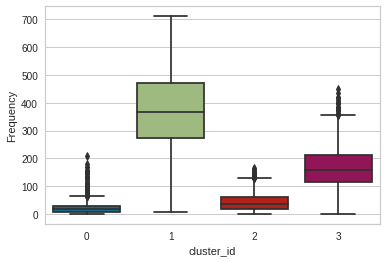

In [331]:
# plot
sns.boxplot(x='cluster_id', y='Frequency', data=customer_RMF_df)
plt.show()

In [332]:
### visualize the result

fig = px.scatter_3d(customer_RMF_df, x='Recency', y='Frequency', z='Monetary',
              color='cluster_id')
fig.show()

Hierarchical Clustering

single

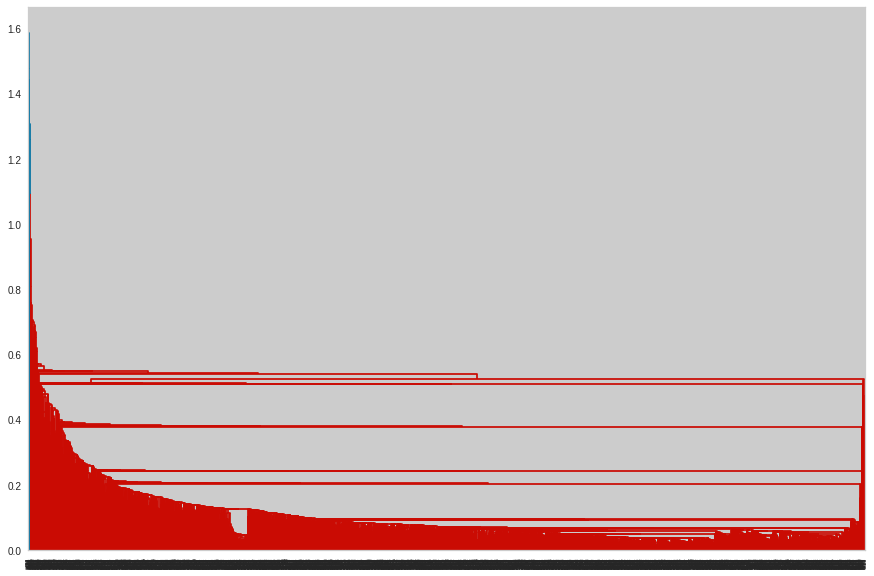

In [333]:
# single linkage
plt.figure(figsize=(15,10))
mergings = linkage(customer_RMF_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()



Average

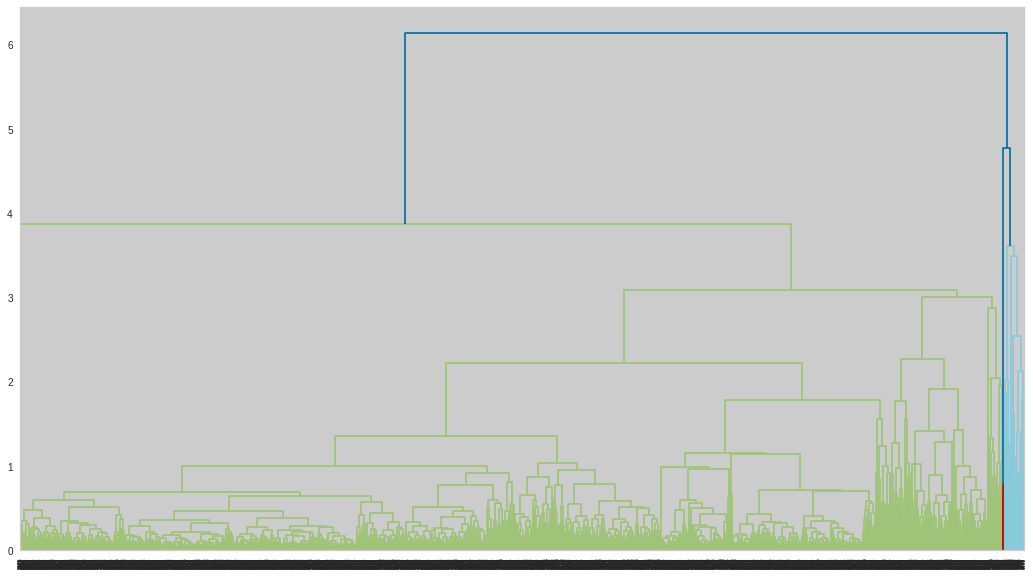

In [334]:
# Average linkage
plt.figure(figsize=(18,10))
mergings1 = linkage(customer_RMF_df_scaled, method="average", metric='euclidean')
dendrogram(mergings1)
plt.show()

complete

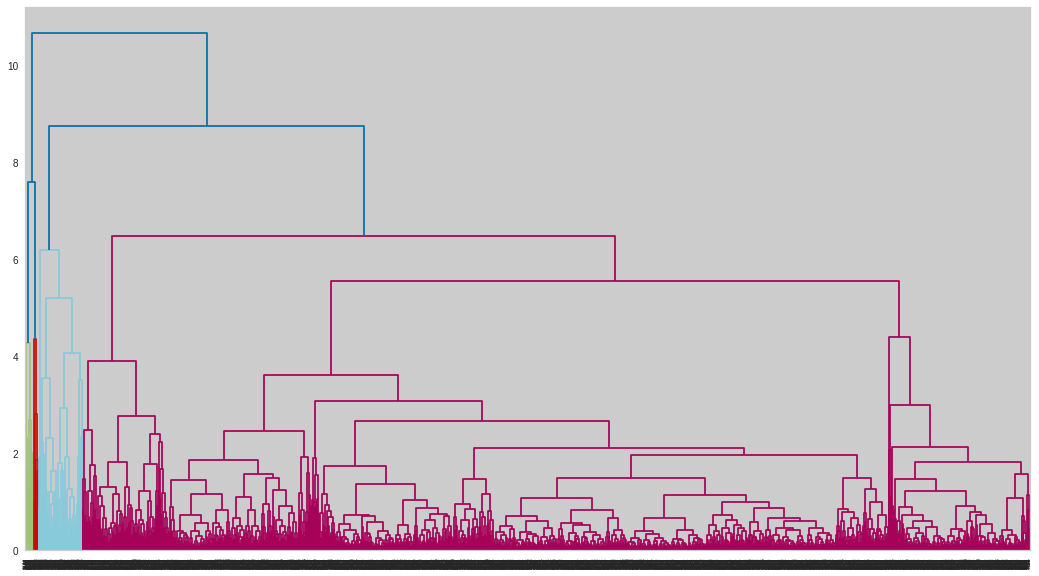

In [335]:
# complete linkage
plt.figure(figsize=(18,10))
mergings3 = linkage(customer_RMF_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings3)
plt.show()

In [336]:
# 3 clusters
cluster_labels = cut_tree(mergings3, n_clusters=3).reshape(-1, )
label2=cluster_labels

In [337]:
# assign cluster labels
customer_RMF_df['cluster_labels_Hi'] = cluster_labels
customer_RMF_df.head()

,CustomerID,Recency,Frequency,Monetary,cluster_id,cluster_labels_Hi
1,12347.0,2.0,182,4310.00,3,0
2,12348.0,75.0,31,1797.24,2,0
3,12349.0,19.0,73,1757.55,2,0
4,12350.0,310.0,17,334.40,0,0
5,12352.0,36.0,85,2506.04,3,0


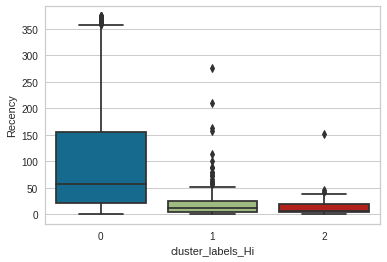

In [338]:
# plots
sns.boxplot(x='cluster_labels_Hi', y='Recency', data=customer_RMF_df)

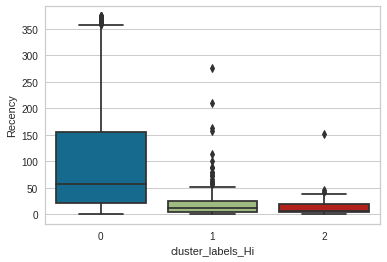

In [339]:
# plots
sns.boxplot(x='cluster_labels_Hi', y='Recency', data=customer_RMF_df)

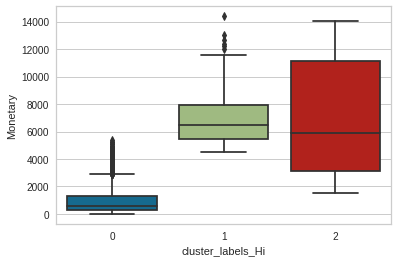

In [340]:
# plots
sns.boxplot(x='cluster_labels_Hi', y='Monetary', data=customer_RMF_df)

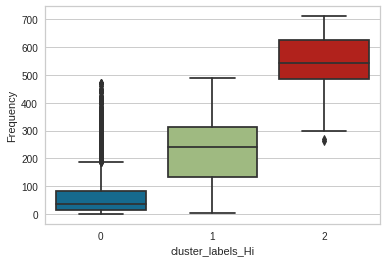

In [341]:
# plots
sns.boxplot(x='cluster_labels_Hi', y='Frequency', data=customer_RMF_df)

In [342]:
### visualize the result

fig = px.scatter_3d(customer_RMF_df, x='Recency', y='Frequency', z='Monetary',
              color='cluster_labels_Hi')
fig.show()

In [343]:
from sklearn.cluster import DBSCAN
clustering_dbscan = DBSCAN(eps=0.6, min_samples=6)
clustering_dbscan.fit(customer_RMF_df_scaled)


# clustering
# DBSCAN(eps=3, min_samples=2)

DBSCAN(eps=0.6, min_samples=6)

In [344]:
label3=clustering_dbscan.labels_

In [345]:
customer_RMF_df['cluster_labels_dbscan'] = clustering_dbscan.labels_

In [346]:
customer_RMF_df.head()

,CustomerID,Recency,Frequency,Monetary,cluster_id,cluster_labels_Hi,cluster_labels_dbscan
1,12347.0,2.0,182,4310.00,3,0,0
2,12348.0,75.0,31,1797.24,2,0,0
3,12349.0,19.0,73,1757.55,2,0,0
4,12350.0,310.0,17,334.40,0,0,0
5,12352.0,36.0,85,2506.04,3,0,0


In [347]:
### visualize the result

fig = px.scatter_3d(customer_RMF_df, x='Recency', y='Frequency', z='Monetary',
              color='cluster_labels_dbscan')
fig.show()

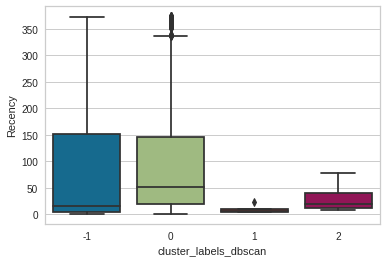

In [348]:
# plots
sns.boxplot(x='cluster_labels_dbscan', y='Recency', data=customer_RMF_df)

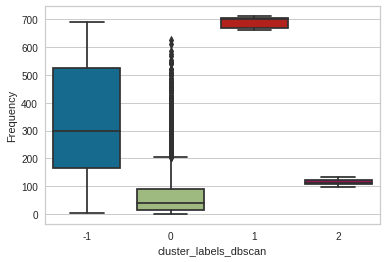

In [349]:
# plots
sns.boxplot(x='cluster_labels_dbscan', y='Frequency', data=customer_RMF_df)

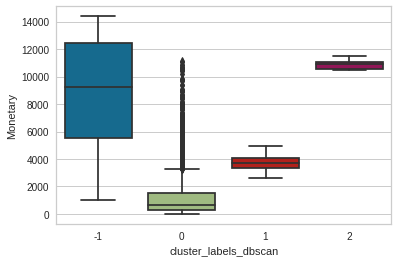

In [350]:
# plots
sns.boxplot(x='cluster_labels_dbscan', y='Monetary', data=customer_RMF_df)

Silhiuette scores

In [352]:
  # silhouette score
silhouette_avg = silhouette_score(customer_RMF_df,label1)

print("the silhouette score is {0}".format(silhouette_avg))

the silhouette score is 0.023378667574253543


In [353]:
  # silhouette score
silhouette_avg1= silhouette_score(customer_RMF_df,label2)
print("the silhouette score is {0}".format(silhouette_avg1))

the silhouette score is 0.5852581856218911


In [354]:
  # silhouette score
silhouette_avg2= silhouette_score(customer_RMF_df,label3)
print("the silhouette score is {0}".format(silhouette_avg2))

the silhouette score is 0.22244962459462178
